# Project 2 - Visualization
Author: Liting Xiao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

## Data Pre-processing

In [2]:
# read in the movie genre file
movies = pd.read_csv('data/movies.txt', delimiter="\t", header=None)

# add column names to be more descriptive and informative
movies.columns = ['Movie Id', 'Movie Title', 'Unknown', 'Action', 'Adventure', 'Animation',
                  'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                  'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# read in train/test/data and add column names
data = pd.read_csv('data/data.txt', delimiter="\t", header=None)
Y_train = pd.read_csv('data/train.txt', delimiter="\t", header=None)
Y_test = pd.read_csv('data/test.txt', delimiter="\t", header=None)

data.columns = ['User Id', 'Movie Id', 'Rating']
Y_train.columns = ['User Id', 'Movie Id', 'Rating']
Y_test.columns = ['User Id', 'Movie Id', 'Rating']

Deal with duplicate movie IDs by replacing the second `Movie Id` with the first in the `data` dataframe:

In [3]:
# group the duplicated movie ids by movie titles
dup = movies[movies.duplicated('Movie Title', keep=False)]
dup_id = dup.groupby('Movie Title')['Movie Id'].apply(np.array).reset_index(name='Dup Id')['Dup Id']

# replace the duplicated 'Movie Ids' with the first
for did in dup_id:
    for i in range(1, len(did)):
        data['Movie Id'].replace({did[i]: did[0]}, inplace=True)
        Y_train['Movie Id'].replace({did[i]: did[0]}, inplace=True)
        Y_test['Movie Id'].replace({did[i]: did[0]}, inplace=True)

## Basic Visualizations

**1. All ratings in the MovieLens Dataset.**

The mean and std of ratings of all movies are 3.53, 1.126.


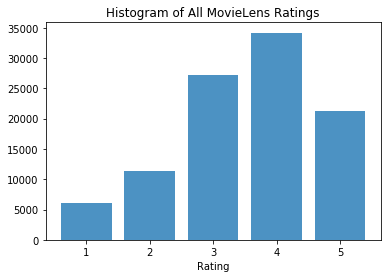

In [4]:
# define nicer bin edges to be [rating-0.4, rating+0.4] for better viz
edges = []
for i in range(1, 6):
    edges.append(i - 0.4)
    edges.append(i + 0.4)

print('The mean and std of ratings of all movies are {:.2f}, {:.3f}.'
      .format(data['Rating'].mean(), data['Rating'].std()))
plt.hist(data['Rating'], bins=edges, alpha=0.8)
plt.title('Histogram of All MovieLens Ratings')
plt.xlabel('Rating')
plt.savefig('figures/rating_all_hist.png')

**2. All ratings of the 10 most popular movies (movies which have received the most ratings).**

The mean and std of ratings of the 10 most popular movies are 3.77, 1.079.


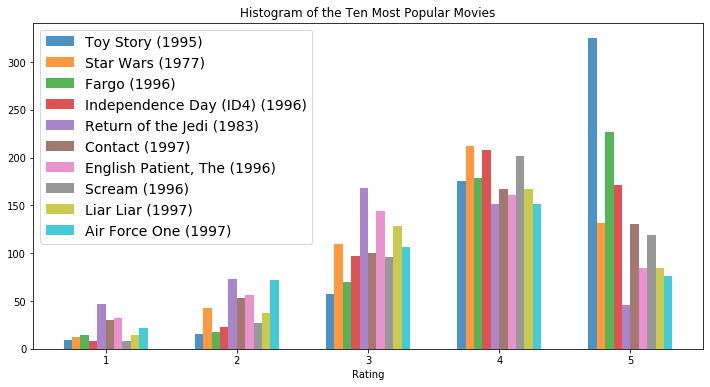

In [5]:
# group ratings by movie ids
ratings_by_movie = data.groupby('Movie Id')['Rating']

# find the titles and rating arrays of the 10 most popular movies
most_pop_id = ratings_by_movie.count().nlargest(10).reset_index(name='Most ratings')['Movie Id']
most_pop_title = movies['Movie Title'].loc[movies['Movie Id'].isin(most_pop_id)]
most_pop_rating = ratings_by_movie.apply(np.array)[most_pop_id].reset_index(name='Rating')['Rating']

# plot hist
print('The mean and std of ratings of the 10 most popular movies are {:.2f}, {:.3f}.'
      .format(np.hstack(most_pop_rating.values).mean(), np.hstack(most_pop_rating.values).std()))
plt.figure(figsize=(12, 6))
plt.hist(most_pop_rating, bins=edges, label=most_pop_title, alpha=0.8)
plt.legend(fontsize=14)
plt.title('Histogram of the Ten Most Popular Movies')
plt.xlabel('Rating')
plt.savefig('figures/rating_pop_hist.png')

**3. All ratings of the 10 best movies (movies with the highest average ratings).**

The mean and std of ratings of the 10 best movies are 5.00, 0.000.


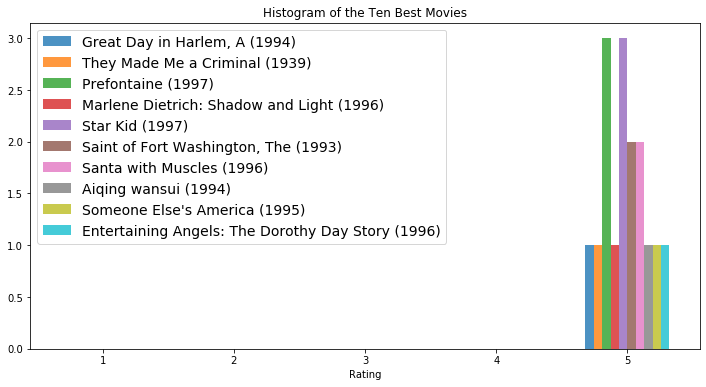

In [6]:
# find the titles and rating arrays of the 10 best movies
best_mov_id = ratings_by_movie.mean().nlargest(10).reset_index(name='Highest mean ratings')['Movie Id']
best_mov_title = movies['Movie Title'].loc[movies['Movie Id'].isin(best_mov_id)]
best_mov_rating = ratings_by_movie.apply(np.array)[best_mov_id].reset_index(name='Rating')['Rating']

# plot hist
print('The mean and std of ratings of the 10 best movies are {:.2f}, {:.3f}.'
      .format(np.hstack(best_mov_rating.values).mean(), np.hstack(best_mov_rating.values).std()))
plt.figure(figsize=(12, 6))
plt.hist(best_mov_rating, bins=edges, label=best_mov_title, alpha=0.8)
plt.legend(fontsize=14)
plt.title('Histogram of the Ten Best Movies')
plt.xlabel('Rating')
plt.savefig('figures/rating_best_hist.png')

Seems like we have a spread of `number of ratings per movie`. Let's histogram that.
And looks like we have a skewed dataset towards lower number of ratings. Let's zoom in to [0, 100] ratings per movie range.

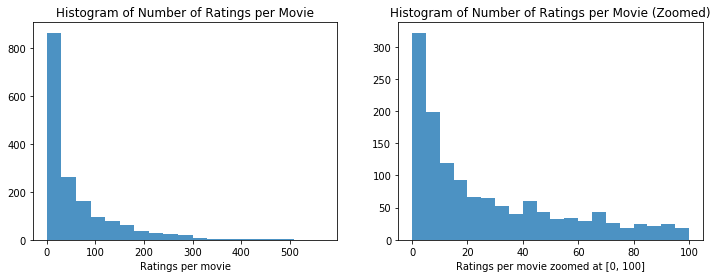

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.hist(ratings_by_movie.count(), bins=np.arange(0, 600, 30), alpha=0.8)
ax1.set_xlabel('Ratings per movie')
ax1.set_title('Histogram of Number of Ratings per Movie')
ax2.hist(ratings_by_movie.count(), bins=np.arange(0, 105, 5), alpha=0.8)
ax2.set_xlabel('Ratings per movie zoomed at [0, 100]')
ax2.set_title('Histogram of Number of Ratings per Movie (Zoomed)')
plt.savefig('figures/ratings_per_movie.png')

Now let's use weighted mean and find the actual 10 best movies with highest weighted average ratings.

The weighted mean and std of ratings of the 10 best movies are 4.01, 1.015.


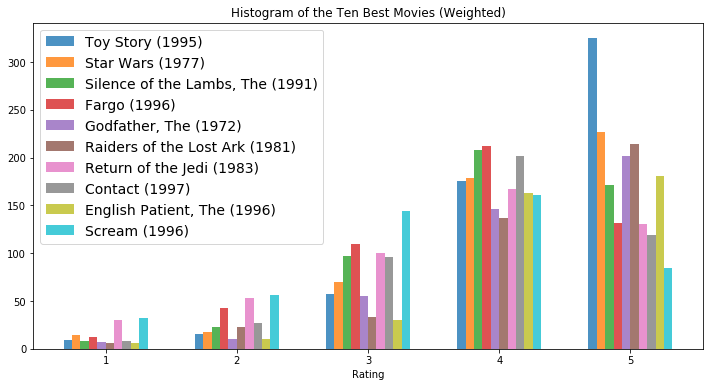

In [8]:
weighted_avg = ratings_by_movie.mean() * ratings_by_movie.count() / ratings_by_movie.count().sum()
best_mov_id2 = weighted_avg.nlargest(10).reset_index(name='Highest weighted mean ratings')['Movie Id']
best_mov_title2 = movies['Movie Title'].loc[movies['Movie Id'].isin(best_mov_id2)]
best_mov_rating2 = ratings_by_movie.apply(np.array)[best_mov_id2].reset_index(name='Rating')['Rating']

# plot hist
print('The weighted mean and std of ratings of the 10 best movies are {:.2f}, {:.3f}.'
      .format(np.hstack(best_mov_rating2.values).mean(), np.hstack(best_mov_rating2.values).std()))
plt.figure(figsize=(12, 6))
plt.hist(best_mov_rating2, bins=edges, label=best_mov_title2, alpha=0.8)
plt.legend(fontsize=14)
plt.title('Histogram of the Ten Best Movies (Weighted)')
plt.xlabel('Rating')
plt.savefig('figures/rating_best_hist2.png')

We have some overlaps between the 10 most popular and the 10 best weighted average. Let's find them.

In [9]:
overlap = []
for pop in most_pop_title:
    for best in best_mov_title2:
        if pop == best:
            overlap.append(pop)
            break
print('The {} movies in both 10 most popular and 10 best are: \n{}'.format(len(overlap),overlap))

The 7 movies in both 10 most popular and 10 best are: 
['Toy Story (1995)', 'Star Wars (1977)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Contact (1997)', 'English Patient, The (1996)', 'Scream (1996)']


**4. All ratings of movies from three genres of your choice (create three separate visualizations).**

Let's visualize the number of movies per genre.

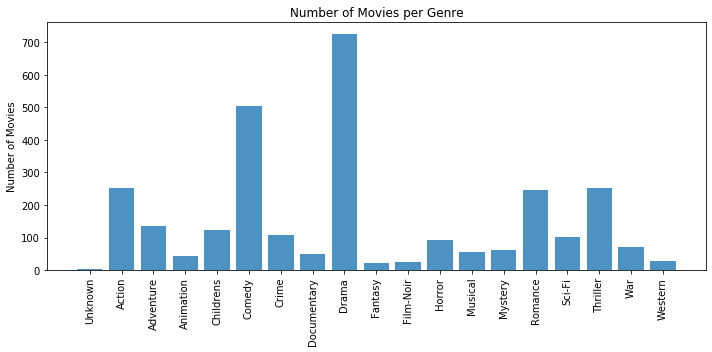

In [10]:
genre_sum = movies.drop(['Movie Id', 'Movie Title'], axis=1).sum()
plt.figure(figsize=(10, 5))
plt.bar(movies.columns[2:], genre_sum, align='center', alpha=0.8)
plt.xticks(rotation=90)
plt.title('Number of Movies per Genre')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('figures/genre_num_movies.png')

Now let's pick 3 genres with the most, medium, few labeled movies: [Drama, Horror, Fantasy].

The mean and std of ratings in the Drama genre are 3.69, 1.079.


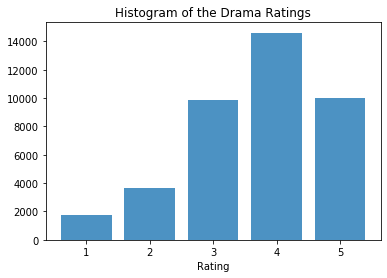

The mean and std of ratings in the Horror genre are 3.29, 1.187.


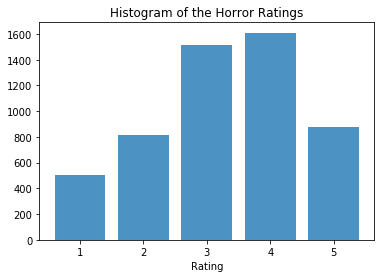

The mean and std of ratings in the Fantasy genre are 3.22, 1.119.


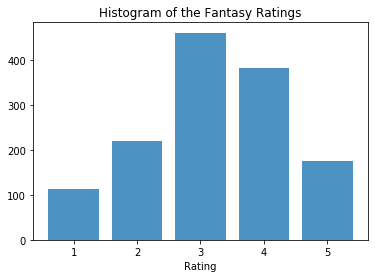

In [11]:
for genre in ['Drama', 'Horror', 'Fantasy']:
    picked_id = movies['Movie Id'][movies[genre] == 1]
    picked_rating = data['Rating'].loc[data['Movie Id'].isin(picked_id)]
    
    print('The mean and std of ratings in the {} genre are {:.2f}, {:.3f}.'
          .format(genre, picked_rating.mean(), picked_rating.std()))
    plt.hist(picked_rating, bins=edges, alpha=0.8)
    plt.title('Histogram of the {} Ratings'.format(genre))
    plt.xlabel('Rating')
    plt.savefig('figures/rating_{}_hist.png'.format(genre))
    plt.show()

## Matrix Factoriazation

**1. Re-use code from HW5. Not including biases.**

*Code from HW5 was modified to include bias terms for use in Method 2.*

In [51]:
def grad_U(Ui, Yij, Vj, reg, eta, mu=0, ai=0, bj=0):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    dUi = reg * Ui - Vj * ((Yij - mu) - (np.dot(Ui, Vj) + ai + bj))
    return eta * dUi

def grad_V(Vj, Yij, Ui, reg, eta, mu=0, ai=0, bj=0):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    dVj = reg * Vj - Ui * ((Yij - mu) - (np.dot(Ui, Vj) + ai + bj))
    return eta * dVj

def grad_A(Ui, Vj, Yij, eta, mu=0, ai=0, bj=0):
    dAi = reg * ai - ((Yij - mu) - (np.dot(Ui, Vj) + ai + bj))
    return eta * dAi

def grad_B(Ui, Vj, Yij, eta, mu=0, ai=0, bj=0):
    dBj = reg * bj - ((Yij - mu) - (np.dot(Ui, Vj) + ai + bj))
    return eta * dBj

def get_err(U, V, Y, reg=0.0, mu=0, A=None, B=None):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    reg_term = reg * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)
    if A is not None:
        reg_term += reg * np.linalg.norm(A)**2
    if B is not None:
        reg_term += reg * np.linalg.norm(B)**2
    
    mse_term = 0
    for sample in Y:
        i, j, rating = sample
        # data are 1-indexed
        ab_term = 0
        if A is not None:
            ab_term += A[i-1]
        if B is not None:
            ab_term += B[j-1]
        mse_term += ((rating - mu) - (np.dot(U[i-1,:], V.T[:,j-1]) + ab_term))**2
    return (reg_term + mse_term) / 2. / len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300, bias=False):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # matrices init
    U = np.random.uniform(-0.5, 0.5, size=(M, K))
    V = np.random.uniform(-0.5, 0.5, size=(N, K))
    if bias:
        A = np.random.uniform(1, 5, size=(M,))
        B = np.random.uniform(1, 5, size=(N,))
        mu = np.mean(Y[:,2])
        last_err = get_err(U, V, Y, reg=reg, mu=mu, A=A, B=B)
    else:
        last_err = get_err(U, V, Y, reg=reg)
    
    # training loop
    for epoch in range(max_epochs):
        # shuffle the dataset
        shuffle_idx = np.random.permutation(len(Y))
        Y_shuf = Y[shuffle_idx]
        
        # training update
        for sample in Y_shuf:
            i, j, rating = sample
            # the data are 1-indexed
            i -= 1
            j -= 1
            
            # calc gradients
            if bias:
                grad_a = grad_A(U[i,:], V.T[:,j], rating, eta, mu=mu, ai=A[i], bj=B[j])
                grad_b = grad_B(U[i,:], V.T[:,j], rating, eta, mu=mu, ai=A[i], bj=B[j])
                grad_ui = grad_U(U[i,:], rating, V.T[:,j], reg, eta, mu=mu, ai=A[i], bj=B[j])
                grad_vj = grad_V(V.T[:,j], rating, U[i,:], reg, eta, mu=mu, ai=A[i], bj=B[j])
            else:
                grad_ui = grad_U(U[i,:], rating, V.T[:,j], reg, eta)
                grad_vj = grad_V(V.T[:,j], rating, U[i,:], reg, eta)
            
            # SGD
            if bias:
                A[i] -= grad_a
                B[j] -= grad_b
            U[i,:] -= grad_ui
            V.T[:,j] -= grad_vj
        
        # obtain current MSE
        if bias:
            err = get_err(U, V, Y_shuf, reg=reg, mu=mu, A=A, B=B)
        else:
            err = get_err(U, V, Y_shuf, reg=reg)
        
        # check for convergence
        if (last_err - err) / last_err < eps: break
        
        # update last_err
        last_err = err
        
    if bias:
        return (U, V, A, B, err)
    return (U, V, err)

In [13]:
# define some hyperparameters
M = max(max(Y_train.values[:,0]), max(Y_test.values[:,0])).astype(int) # users
N = max(max(Y_train.values[:,1]), max(Y_test.values[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
K = 20

Factorizing with  943  users,  1682  movies.


Now let's find good regularization parameter and learning rate.

In [18]:
def ein_eout_thru_hyperparams(regs, etas, Y_train, Y_test, plot_name, bias=False):
    E_ins = []
    E_outs = []

    # Compute Ein and Eout
    for reg in regs:
        E_ins_for_lambda = []
        E_outs_for_lambda = []

        for eta in etas:
            print("Training model with M = %s, N = %s, K = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
            if bias:
                U, V, A, B, e_in = train_model(M, N, K, eta, reg, Y_train.values, bias=True)
                eout = get_err(U, V, Y_test.values, mu=np.mean(Y_test.values), A=A, B=B)
            else:
                U, V, e_in = train_model(M, N, K, eta, reg, Y_train.values)
                eout = get_err(U, V, Y_test.values)
            
            E_ins_for_lambda.append(e_in)
            E_outs_for_lambda.append(eout)

        E_ins.append(E_ins_for_lambda)
        E_outs.append(E_outs_for_lambda)

    E_ins = np.array(E_ins)
    E_outs = np.array(E_outs)

    # Plot values of E_in across eta for each value of lambda
    for i in range(len(regs)):
        plt.plot(etas, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
    plt.title('$E_{in}$ vs. $\eta$')
    plt.xlabel('$\eta$')
    plt.ylabel('Error')
    plt.legend()
    plt.savefig('figures/{}_ein.png'.format(plot_name))
    plt.show()
    plt.clf()

    # Plot values of E_out across eta for each value of lambda
    for i in range(len(regs)):
        plt.plot(etas, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
    plt.title('$E_{out}$ vs. $\eta$')
    plt.xlabel('$\eta$')
    plt.ylabel('Error')
    plt.legend()
    plt.savefig('figures/{}_eout.png'.format(plot_name))
    plt.show()
    
    return (E_ins, E_outs)

Recall that in HW5, the best $\lambda$ = 0.1, and $\eta$ = 0.03 was used. And that works well already. So, let's try values around that.

Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.03
Training model with M = 943, N = 1682, K = 20, eta = 0.03, reg = 0.03
Training model with M = 943, N = 1682, K = 20, eta = 0.1, reg = 0.03
Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.1
Training model with M = 943, N = 1682, K = 20, eta = 0.03, reg = 0.1
Training model with M = 943, N = 1682, K = 20, eta = 0.1, reg = 0.1
Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.3
Training model with M = 943, N = 1682, K = 20, eta = 0.03, reg = 0.3
Training model with M = 943, N = 1682, K = 20, eta = 0.1, reg = 0.3


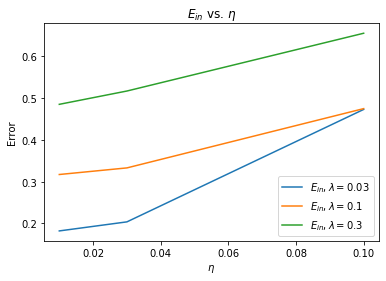

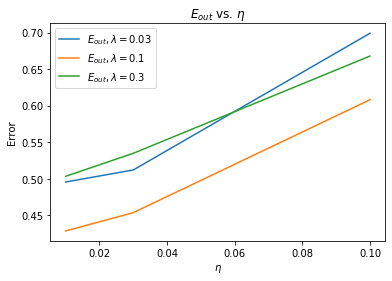

In [15]:
regs = [0.03, 0.1, 0.3]
etas = [0.01, 0.03, 0.1]

E_ins, E_outs = ein_eout_thru_hyperparams(regs, etas, Y_train, Y_test, 'sgd')

From the above plots, $\eta$ = 0.01, reg = 0.1 gives the minimum E_out. No overfitting.

So, let's use them to train on the whole dataset and get the final U and V for method 1. 

In [16]:
E_ins_method = []
E_outs_method = []
matrices_and_err = []

index = np.unravel_index(np.argmin(E_outs), E_outs.shape)
reg = regs[index[0]]
eta = etas[index[1]]
print("Training model with M = %s, N = %s, K = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))

# Append E_in and E_out for the first method with reg=0.1 and eta=0.01
E_ins_method.append(E_ins[index])
E_outs_method.append(E_outs[index])

# Append the matrices and final MSE for method 1
matrices_and_err.append(train_model(M, N, K, eta, reg, data.values))

Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.1


**2. Incorporate bias terms a for each user and b for each movie.**

Since this method is similar to method1, let's use $\eta=0.01$, $\lambda=0.1$.

In [75]:
# Find train / test error
K = 20
eta = 0.01
reg = 0.1
U, V, A, B, e_in = train_model(M, N, K, eta, reg, Y_train.values, bias=True)

# Append E_in and E_out for the first method with reg=0.1 and eta=0.01
E_ins_method.append(e_in)
E_outs_method.append(eout)

0.25497589241895147 0.427409019156015


In [76]:
# Final Model
print("Training model with M = %s, N = %s, K = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
matrices_and_err.append(train_model(M, N, K, eta, reg, data.values, bias=True))

Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.1


**3. Off-the-shelf implementation using Surprise SVD.**

Re-index to deal with movies with no reviews in `Y_train`. Also re-index `Y_test` accordingly.

In [23]:
# find the missing movie IDs in Y_train
missing = movies['Movie Id'][~movies['Movie Id'].isin(Y_train['Movie Id'])].values

# re-index
val = 0
for m in sorted(missing):
    Y_train['Movie Id'][Y_train['Movie Id'] > (m-val)] -= 1
    Y_test['Movie Id'][Y_test['Movie Id'] > (m-val)] -= 1
    val += 1

Now, implement the matrix factorization.

In [24]:
from surprise import SVD, Dataset, Reader, accuracy

In [63]:
# Load datasets from pandas.dataframe to Surprise
reader = Reader(sep='\t')

# need to use unchanged original data
data = pd.read_csv('data/data.txt', delimiter="\t", header=None)
data.columns = ['User Id', 'Movie Id', 'Rating']

train3 = Dataset.load_from_df(Y_train, reader=reader)
test3 = Dataset.load_from_df(Y_test, reader=reader)
data3 = Dataset.load_from_df(data, reader=reader)

train3 = train3.build_full_trainset()
test3 = test3.build_full_trainset().build_testset()
data3 = data3.build_full_trainset()

Train and test to see performance by looking at MSE.

To choose ~optimal hyperparams, like before, loop through different params. Not gonna loop through reg in the interest of time, since it doesn't matter much. Looping through K's and $\eta$'s.

Training model with M = 943, N = 1682, K = 20, eta = 0.01, reg = 0.1
Training model with M = 943, N = 1682, K = 20, eta = 0.03, reg = 0.1
Training model with M = 943, N = 1682, K = 20, eta = 0.1, reg = 0.1
Training model with M = 943, N = 1682, K = 60, eta = 0.01, reg = 0.1
Training model with M = 943, N = 1682, K = 60, eta = 0.03, reg = 0.1
Training model with M = 943, N = 1682, K = 60, eta = 0.1, reg = 0.1
Training model with M = 943, N = 1682, K = 100, eta = 0.01, reg = 0.1
Training model with M = 943, N = 1682, K = 100, eta = 0.03, reg = 0.1
Training model with M = 943, N = 1682, K = 100, eta = 0.1, reg = 0.1


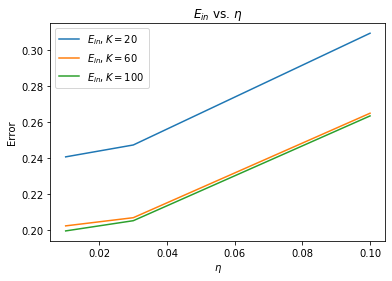

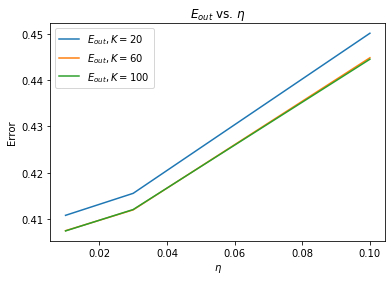

In [26]:
etas = [0.01, 0.03, 0.1]
Ks = [20, 60, 100]
E_ins = []
E_outs = []

# Compute Ein and Eout
for K in Ks:
    E_ins_for_k = []
    E_outs_for_k = []

    for eta in etas:
        print("Training model with M = %s, N = %s, K = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
        algo = SVD(n_epochs=300, n_factors=K, lr_all=eta, reg_all=reg)
        preds = algo.fit(train3).test(test3)
        
        e_in = accuracy.mse(algo.test(train3.build_testset()), verbose=False) / 2.
        eout = accuracy.mse(preds, verbose=False) / 2.
        E_ins_for_k.append(e_in)
        E_outs_for_k.append(eout)

    E_ins.append(E_ins_for_k)
    E_outs.append(E_outs_for_k)

E_ins = np.array(E_ins)
E_outs = np.array(E_outs)

# Plot values of E_in across eta for each value of lambda
for i in range(len(Ks)):
    plt.plot(etas, E_ins[i], label='$E_{in}, K=$'+str(Ks[i]))
plt.title('$E_{in}$ vs. $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('figures/surprise_ein.png')
plt.show()
plt.clf()

# Plot values of E_out across eta for each value of lambda
for i in range(len(Ks)):
    plt.plot(etas, E_outs[i], label='$E_{out}, K=$'+str(Ks[i]))
plt.title('$E_{out}$ vs. $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('figures/surprise_eout.png')

In [27]:
# Append E_in and E_out for the first method with K=100 and eta=0.01
index = np.unravel_index(np.argmin(E_outs), E_outs.shape)
K3 = Ks[index[0]]
eta = etas[index[1]]

E_ins_method.append(E_ins[index])
E_outs_method.append(E_outs[index])

In [66]:
# finally, train on the whole set to get final matrices
print("Training model with M = %s, N = %s, K = %s, eta = %s, reg = %s"%(M, N, K3, eta, reg))
final_algo = SVD(n_epochs=300, n_factors=K3, lr_all=eta, reg_all=reg)
final_algo.fit(data3)
matrices_and_err.append([final_algo.pu, final_algo.qi, final_algo.bu, final_algo.bi,
                         accuracy.mse(final_algo.test(data3.build_testset()), verbose=False)])

Training model with M = 943, N = 1682, K = 100, eta = 0.01, reg = 0.1


### Compare the performance of the 3 methods

In [79]:
method = 1
for ein, eout in zip(E_ins_method, E_outs_method):
    print('Method {}: E_in = {:.4f}, E_out = {:.4f}.'.format(method, ein, eout))
    method += 1

Method 1: E_in = 0.3172, E_out = 0.4287.
Method 2: E_in = 0.2550, E_out = 0.4274.
Method 3: E_in = 0.1993, E_out = 0.4075.


Thus, method 3 performs the best. 

## Matrix Factoriazation Visualizations

Apply SVD to V.

In [159]:
A_svd = np.array([np.linalg.svd(matrices_and_err[i][1].T) for i in range(3)])[:,0]
viz = [np.matmul(A_svd[i][:,1:3].T, matrices_and_err[i][1].T) for i in range(3)]

In [166]:
def movie_viz_2d(vizmat, picked_id, picked_title, plot_title, plot_name):
    plt.figure(figsize=(8, 6))
    plt.axhline(0, color='k', linewidth=0.7)
    plt.axvline(0, color='k', linewidth=0.7)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(plot_title)
    plt.scatter(vizmat.T[picked_id][:,0], vizmat.T[picked_id][:,1])

    # add movie titles
    for i, txt in enumerate(picked_title):
        plt.annotate(txt, (vizmat.T[picked_id][:,0][i], vizmat.T[picked_id][:,1][i]))

    plt.savefig('figures/{}.png'.format(plot_name))

(a) 10 random movies from the MovieLens dataset.

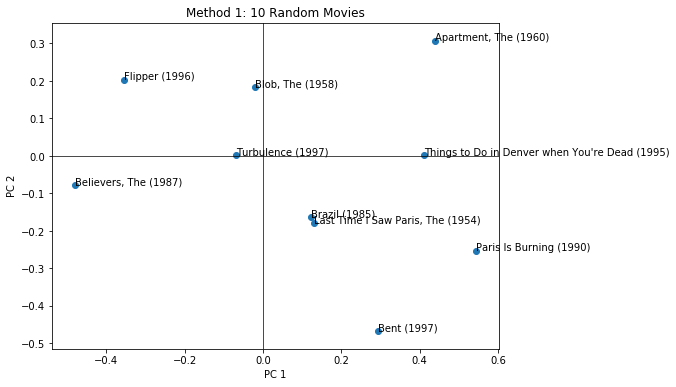

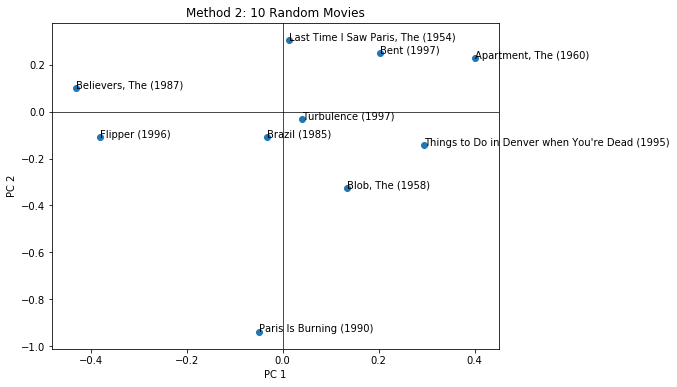

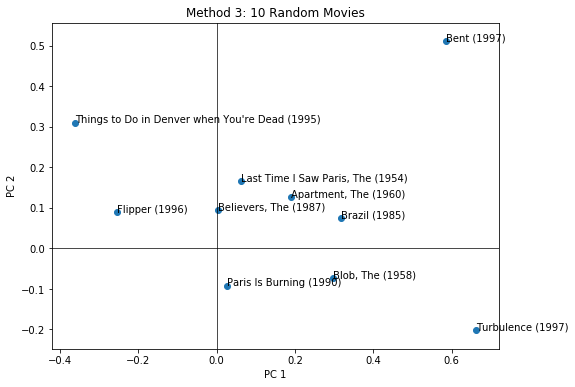

In [172]:
random_id = movies.sample(n = 10)['Movie Id'].values
random_title = movies['Movie Title'].loc[movies['Movie Id'].isin(random_id)].values

for i, vizmat in enumerate(viz):
    movie_viz_2d(vizmat, random_id, random_title, 
                 'Method {}: 10 Random Movies'.format(i+1), 'random'+str(i+1))

(b) 10 most popular movies.

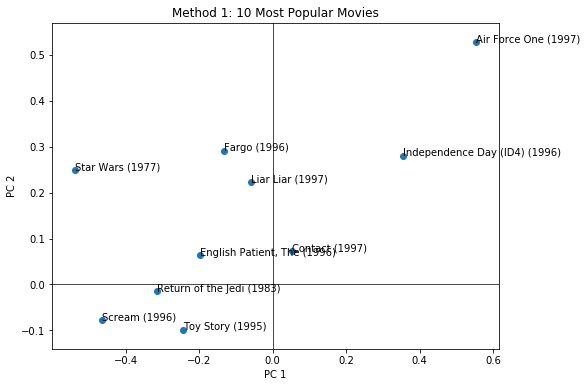

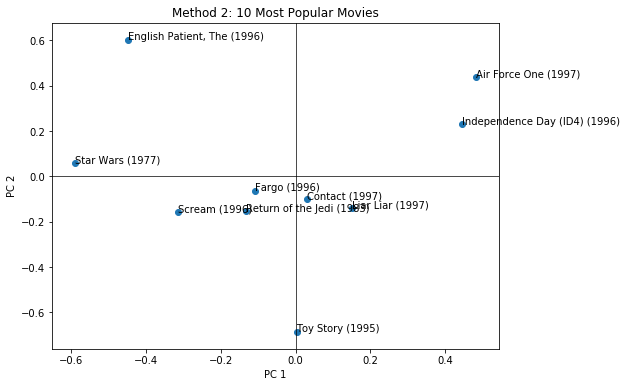

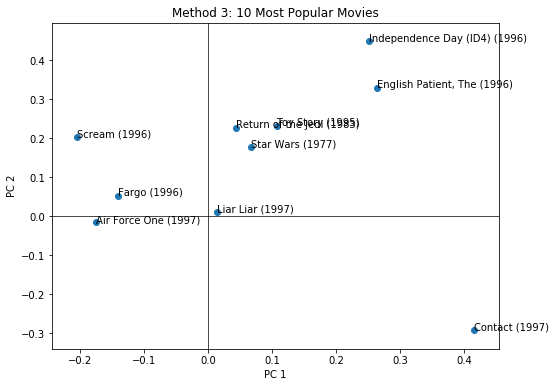

In [173]:
for i, vizmat in enumerate(viz):
    movie_viz_2d(vizmat, most_pop_id.values, most_pop_title.values,
                 'Method {}: 10 Most Popular Movies'.format(i+1), 'pop'+str(i+1))

(c) 10 best movies.

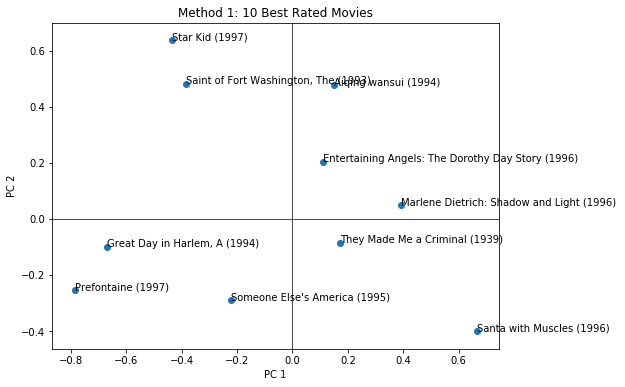

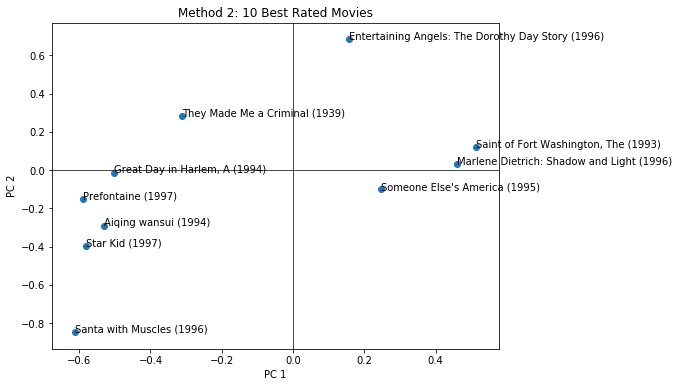

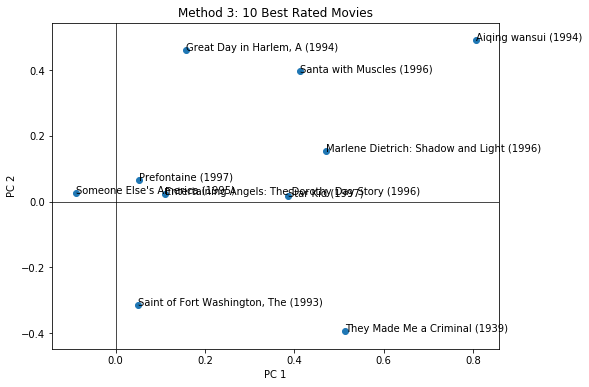

In [174]:
for i, vizmat in enumerate(viz):
    movie_viz_2d(vizmat, best_mov_id.values, best_mov_title.values,
                 'Method {}: 10 Best Rated Movies'.format(i+1), 'best'+str(i+1))

(d) 10 each from ['Drama', 'Horror', 'Fantasy'].

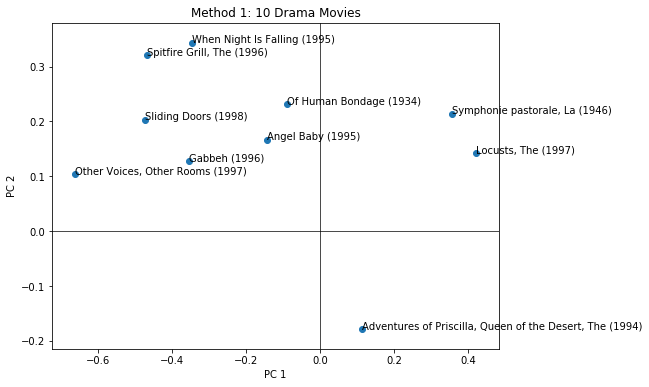

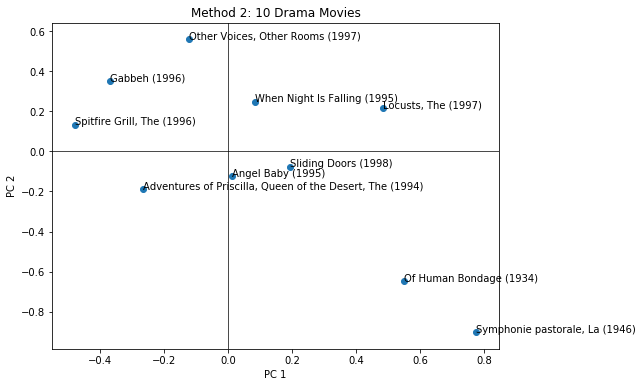

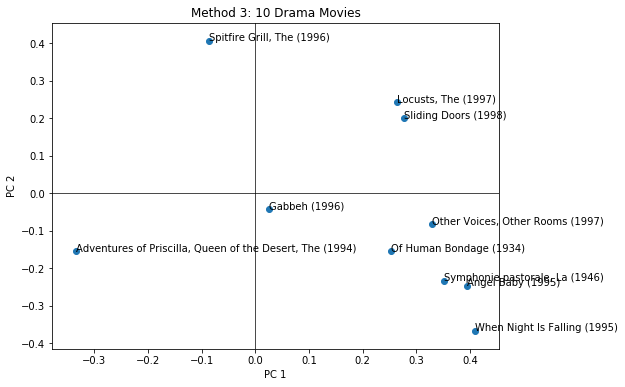

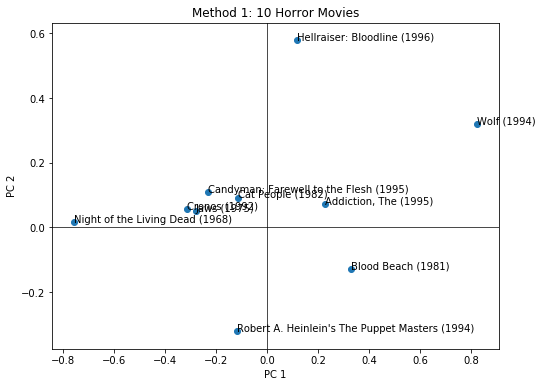

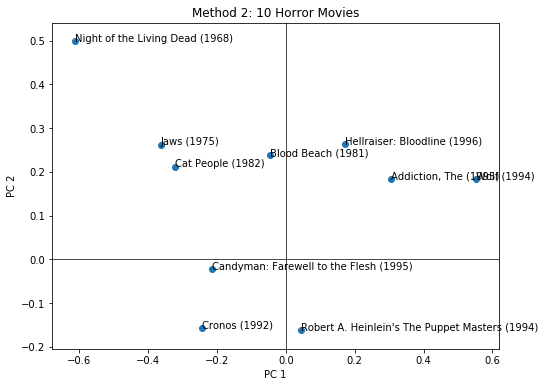

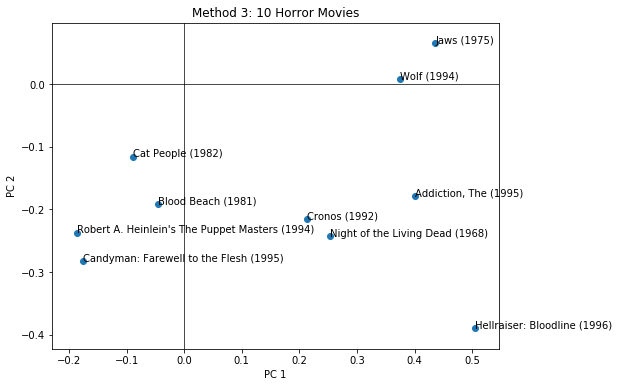

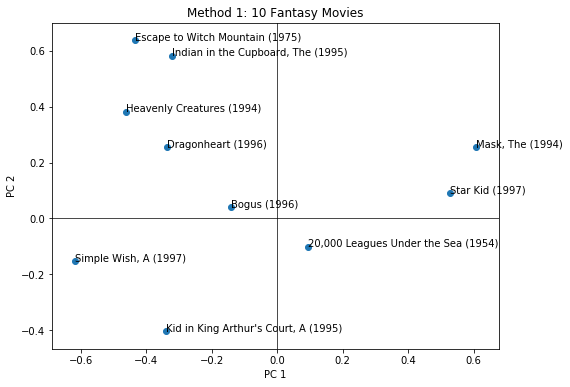

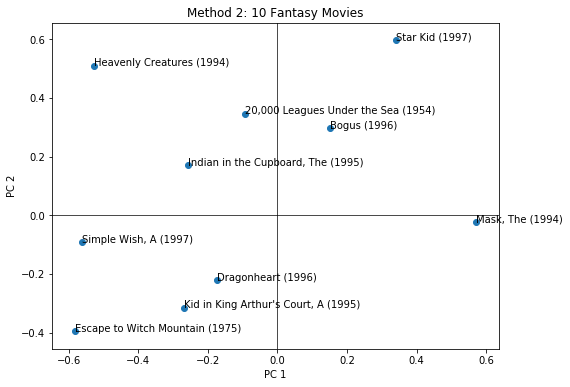

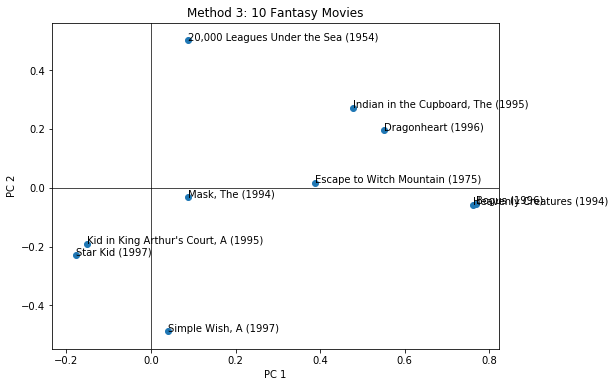

In [175]:
for genre in ['Drama', 'Horror', 'Fantasy']:
    genre_id = movies[movies[genre] == 1].sample(n = 10)['Movie Id'].values
    genre_title = movies['Movie Title'].loc[movies['Movie Id'].isin(genre_id)].values
    for i, vizmat in enumerate(viz):
        movie_viz_2d(vizmat, genre_id, genre_title,
                     'Method {}: 10 {} Movies'.format(i+1, genre), genre+str(i+1))